# Project 1: Data Story with Philosophy data

Q1 : Trendline of school of philosophy

Q2 : Word Cloud for diff schools

Q3 : Common words among diff schools

Q4 : Writing style of diff pholisophers

    a: Length of sentences for each philo
    b: Sentiment analysis

Q5 : Sentiment variation for philosopher in one book... (start positive / end negative etc)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.patches as mpatches
from nrclex import NRCLex
import numpy as np

In [2]:
# Loading the data

phil_data_raw = pd.read_csv(r'C:\Users\aakan\Downloads\philosophy_data1.csv')

In [3]:
# Q1 Trendline of school of philosophy Dataset

Q1_data = phil_data_raw[['school']].groupby(['school']).max()
Q1_data['min_pub'] = phil_data_raw[['school','original_publication_date']].groupby(['school']).min()
Q1_data['max_pub'] = phil_data_raw[['school','original_publication_date']].groupby(['school']).max()
Q1_data['lim_pub'] = Q1_data['max_pub'] - Q1_data['min_pub']

Q1_data.loc[Q1_data['lim_pub'] == 0, 'lim_pub'] = 2
Q1_data.reset_index(inplace=True)
Q1_data.sort_values(by=['min_pub'], inplace = True)
#display(Q1_data)

Q1_data_pos = Q1_data.loc[Q1_data['max_pub'] > 200]
Q1_data_neg = Q1_data.loc[Q1_data['max_pub'] < 200]

In [4]:
phil_data_raw

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."
...,...,...,...,...,...,...,...,...,...,...,...
360803,"Women, Race, And Class",Davis,feminism,But the socialization of housework including m...,But the socialization of housework including m...,1981,1981,142,but the socialization of housework including m...,"['but', 'the', 'socialization', 'of', 'housewo...",but the socialization of housework include me...
360804,"Women, Race, And Class",Davis,feminism,The only significant steps toward endingdomest...,The only significant steps toward endingdomest...,1981,1981,117,the only significant steps toward endingdomest...,"['the', 'only', 'significant', 'steps', 'towar...",the only significant step toward endingdomest...
360805,"Women, Race, And Class",Davis,feminism,"Working women, therefore, have a special and v...","Working women, therefore, have a special and v...",1981,1981,90,"working women, therefore, have a special and v...","['working', 'women', 'therefore', 'have', 'spe...","working woman , therefore , have a special an..."
360806,"Women, Race, And Class",Davis,feminism,"Moreover, under capitalism, campaigns for jobs...","Moreover, under capitalism, campaigns for jobs...",1981,1981,199,"moreover, under capitalism, campaigns for jobs...","['moreover', 'under', 'capitalism', 'campaigns...","moreover , under capitalism , campaign for jo..."


<ipython-input-5-bd740eefff23>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Q1_data_pos['school'], rotation=90)
<ipython-input-5-bd740eefff23>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Q1_data_neg['school'], rotation=90)


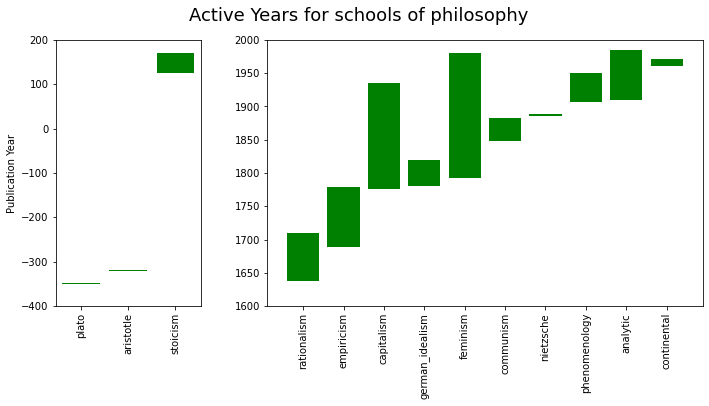

In [5]:
fig, (ax2, ax1) = plt.subplots(1, 2, sharex=False, sharey=False , gridspec_kw={'width_ratios': [1, 3]})
fig.subplots_adjust(hspace=0.05)

ax1.bar(Q1_data_pos['school'], Q1_data_pos['lim_pub'], bottom = Q1_data_pos['min_pub'], color = 'green')
ax2.bar(Q1_data_neg['school'], Q1_data_neg['lim_pub'], bottom = Q1_data_neg['min_pub'], color = 'green')

ax1.set_ylim(1600, 2000)  
ax2.set_ylim(-400, 200)

fig.tight_layout(pad=0.0)
ax1.set_xticklabels(Q1_data_pos['school'], rotation=90)
ax2.set_xticklabels(Q1_data_neg['school'], rotation=90)

fig.suptitle('Active Years for schools of philosophy', fontsize=18.0, y = 1.1)
ax2.set_ylabel('Publication Year')
#f.set_figheight(15)
fig.set_figwidth(10)

plt.show()

* Capitalism and Feminism are longest lasting school of thoughts. Capitalism shows to have lasted way longer than communism.
* Feminism school of thought overlaps with The Women’s Rights Movement (The first wave of feminism) last from 1848–1917. This was largely discussed topic at that time due to the fight for voting rights for women. The second wave for feminism went from 1963 to 1980's which explains the publications lasting for this duration.
* Latest school of philosophy are 'Phenomenology', 'Analytic', and 'Continental'.

In [6]:
# Q2 School of thought overlap

schools = set(phil_data_raw['school'])
schools_words = {}

# for school in schools:
#     sentence = ''
#     for words in phil_data_raw[phil_data_raw['school'] == school]['sentence_lowered']:
#         sentence = sentence + ' ' + words

#     schools_words[school] = sentence
#     print(school)

for school in schools:
    #schools_words[school] = ' '.join(phil_data_raw[phil_data_raw['school'] == school]['sentence_lowered'].tolist())
    schools_words[school] = ' '.join(phil_data_raw[phil_data_raw['school'] == school]['lemmatized_str'].tolist())
    #print(school)

In [7]:
# with column 'lemmatized_str'

corpus = []
schools = []
for school in schools_words:
    schools.append(school)
    corpus.append(schools_words[school])
    
my_stop_words = text.ENGLISH_STOP_WORDS.union(["pron"])

vectorizer = TfidfVectorizer(stop_words = my_stop_words)
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

clouds_dict1 = {}

for i in range(len(df)):
    #print(schools[i])
    Cloud = WordCloud(background_color = "white", max_words = 50).generate_from_frequencies(df.iloc[i])
    clouds_dict1[schools[i]] = Cloud

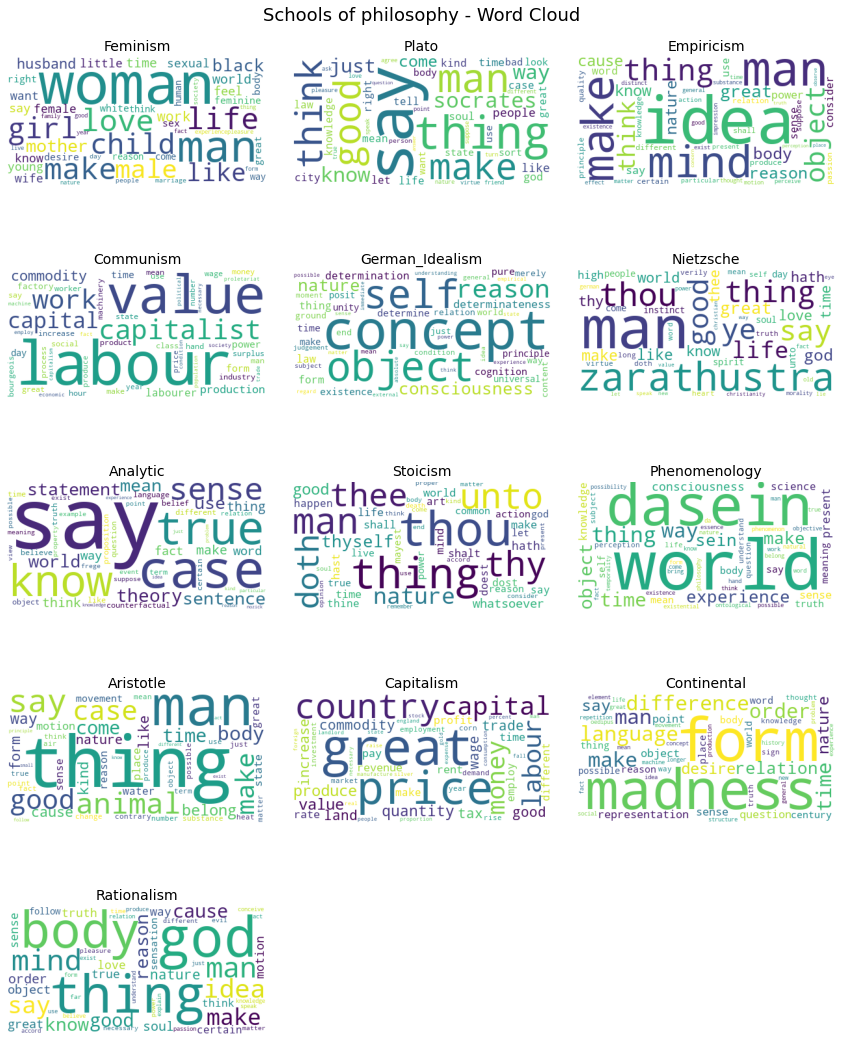

In [8]:
fig, axes = plt.subplots(5, 3, sharex=False, sharey=False)

fig.delaxes(axes[4,1])
fig.delaxes(axes[4,2])

for i in range(len(schools)):
    x = i // 3
    y = i % 3
    axes[x,y].imshow(clouds_dict1[schools[i]])
    axes[x,y].set_axis_off()
    axes[x,y].set_title(schools[i].title(), fontsize=14.0)
    
fig.tight_layout(pad=0.5)
fig.suptitle('Schools of philosophy - Word Cloud', fontsize=18.0, y = 0.97)
fig.set_figwidth(12)
fig.set_figheight(15)
plt.show()

In [9]:
top_words = {}

for school in schools:
    top_words[school] = list(clouds_dict1[school].words_.keys())

common_words = pd.DataFrame({'School_A':[],'School_B':[],'Common_words':[],'Common_word_count':[]})

for i in range(len(schools)):
    for j in range(i+1, len(schools)):
        common_words = common_words.append({'School_A': schools[i],
                                            'School_B': schools[j],
                                            'Common_words': sorted(set(top_words[schools[i]])&set(top_words[schools[j]]), key = lambda k : top_words[schools[i]].index(k)),
                                            'Common_word_count': len(sorted(set(top_words[schools[i]])&set(top_words[schools[j]]), key = lambda k : top_words[schools[i]].index(k)))}, 
                                           ignore_index = True)

common_words.sort_values(by = 'Common_word_count', ascending = False, inplace = True)
common_words[0:5][['School_A','School_B','Common_word_count']]

,School_A,School_B,Common_word_count
32,empiricism,rationalism,29.0
74,aristotle,rationalism,27.0
29,empiricism,aristotle,24.0
19,plato,aristotle,23.0
59,analytic,aristotle,23.0


In [19]:
# with column 'sentence lowered'
schools = sorted(list(set(phil_data_raw['school'])))
schools_words = {}

for school in schools:
    schools_words[school] = ' '.join(phil_data_raw[phil_data_raw['school'] == school]['sentence_lowered'].tolist())
    
corpus = []
schools = []
for school in schools_words:
    schools.append(school)
    corpus.append(schools_words[school])

vectorizer = TfidfVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)

clouds_dict = {}

for i in range(len(df)):
    #print(schools[i])
    Cloud = WordCloud(background_color = "white", max_words = 50).generate_from_frequencies(df.iloc[i])
    clouds_dict[schools[i]] = Cloud

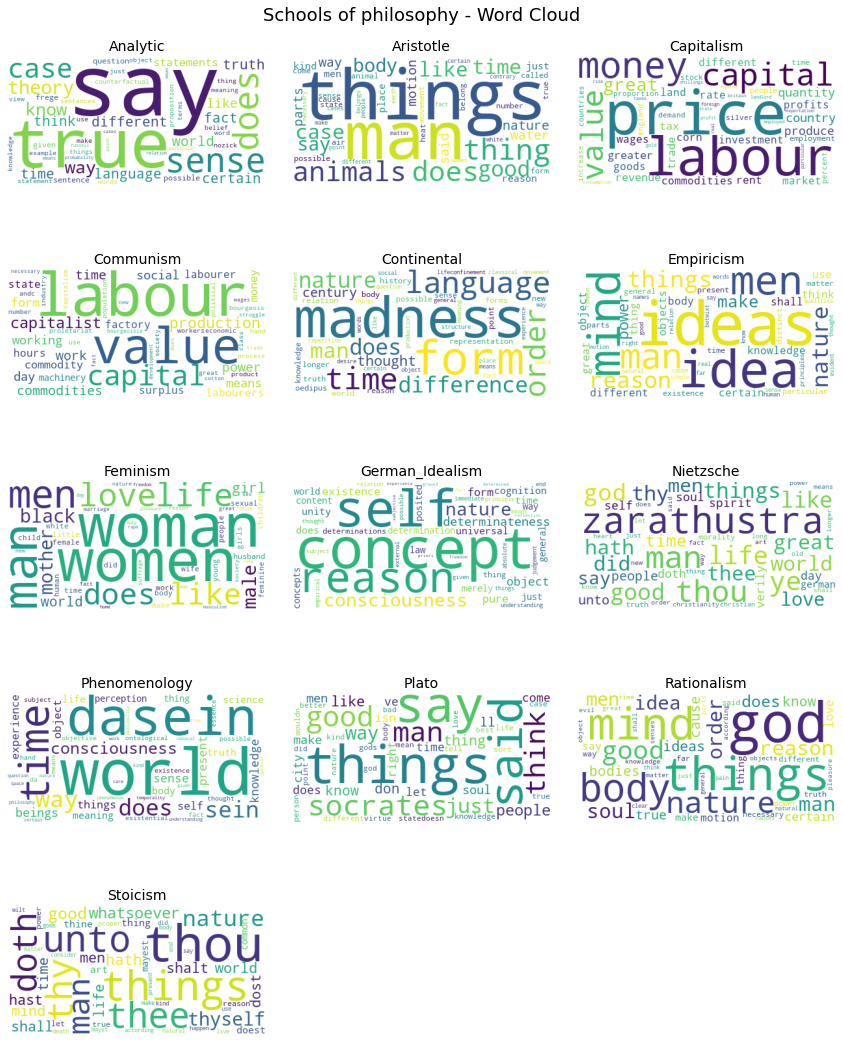

In [20]:
fig, axes = plt.subplots(5, 3, sharex=False, sharey=False)

fig.delaxes(axes[4,1])
fig.delaxes(axes[4,2])

for i in range(len(schools)):
    x = i // 3
    y = i % 3
    axes[x,y].imshow(clouds_dict[schools[i]])
    axes[x,y].set_axis_off()
    axes[x,y].set_title(schools[i].title(), fontsize=14.0)
    
fig.tight_layout(pad=0.5)
fig.suptitle('Schools of philosophy - Word Cloud', fontsize=18.0, y = 0.97)
fig.set_figwidth(12)
fig.set_figheight(15)
plt.show()

In [21]:
# Q3 finding schools with most common words

top_words = {}

for school in schools:
    top_words[school] = list(clouds_dict[school].words_.keys())

common_words = pd.DataFrame({'School_A':[],'School_B':[],'Common_words':[],'Common_word_count':[]})

for i in range(len(schools)):
    for j in range(i+1, len(schools)):
        common_words = common_words.append({'School_A': schools[i],
                                            'School_B': schools[j],
                                            'Common_words': sorted(set(top_words[schools[i]])&set(top_words[schools[j]]), key = lambda k : top_words[schools[i]].index(k)),
                                            'Common_word_count': len(sorted(set(top_words[schools[i]])&set(top_words[schools[j]]), key = lambda k : top_words[schools[i]].index(k)))}, 
                                           ignore_index = True)

common_words.sort_values(by = 'Common_word_count', ascending = False, inplace = True)
common_words[0:5][['School_A','School_B','Common_word_count']]

,School_A,School_B,Common_word_count
55,empiricism,rationalism,31.0
21,aristotle,rationalism,23.0
20,aristotle,plato,23.0
75,plato,rationalism,22.0
46,continental,phenomenology,22.0


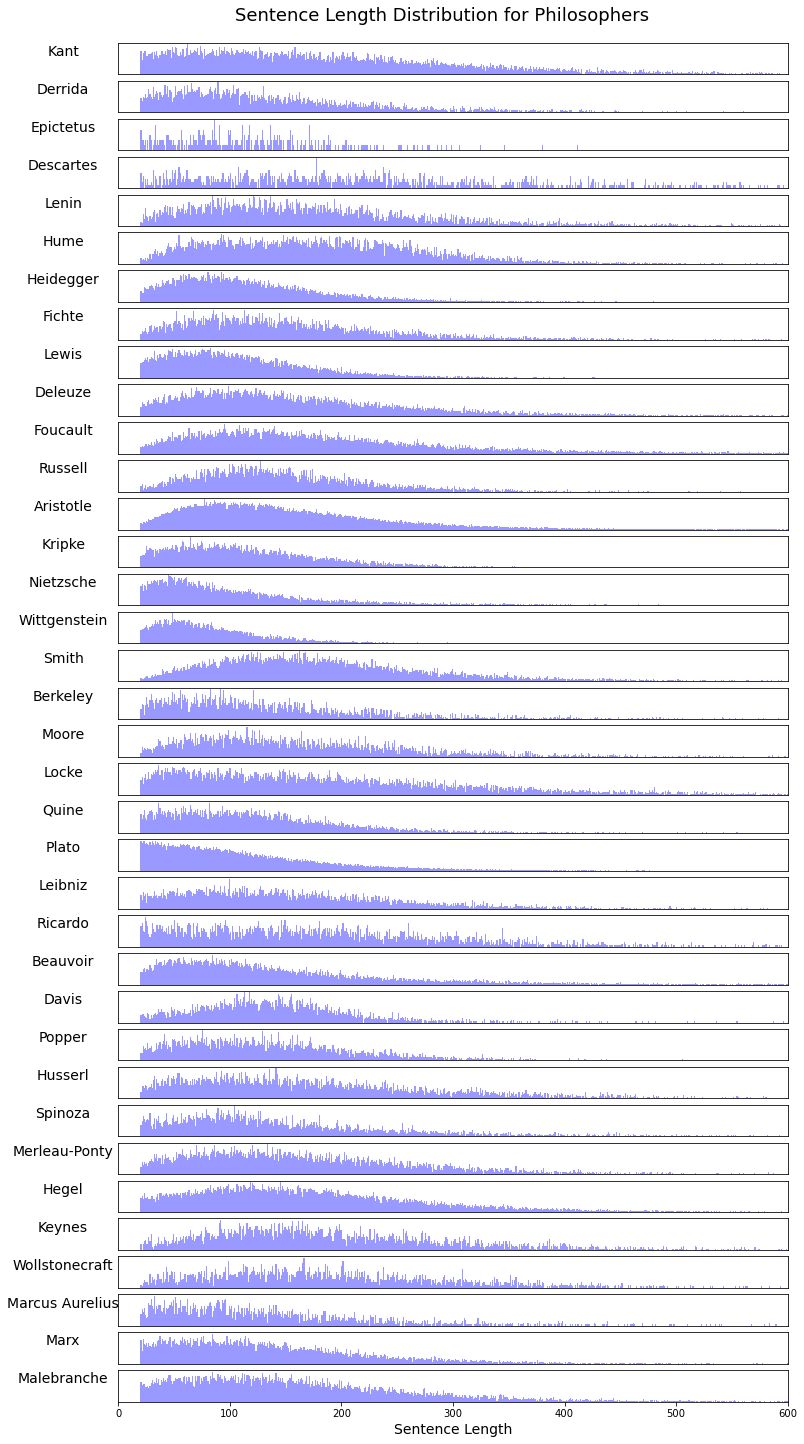

In [22]:
# Q4 : Writing style of different pholisophers
# Part A : Sentence Length

authors = list(set(phil_data_raw['author']))
word_len_dict = {}

for author in authors:
    word_len_dict[author] = phil_data_raw[phil_data_raw['author'] == author]['sentence_length'].tolist()

fig, axes = plt.subplots(36, 1, sharex=False, sharey=False)

for i in range(len(authors)):
    axes[i].hist(word_len_dict[authors[i]], bins=range(min(word_len_dict[authors[i]]), max(word_len_dict[authors[i]]) + 1, 1), 
              alpha=0.4, color="blue")
    axes[i].axes.yaxis.set_ticks([])
    if i<len(authors)-1:
        axes[i].axes.xaxis.set_ticks([])
    
    axes[i].set_xlim(0,600)
    axes[i].set_ylabel(authors[i].title(), fontsize=14.0, labelpad = 55.0, rotation = 0)
    
    
axes[35].set_xlabel('Sentence Length', fontsize=14.0)
fig.suptitle('Sentence Length Distribution for Philosophers', fontsize=18.0, y = 0.9)
fig.set_figwidth(12)
fig.set_figheight(25)
plt.show()

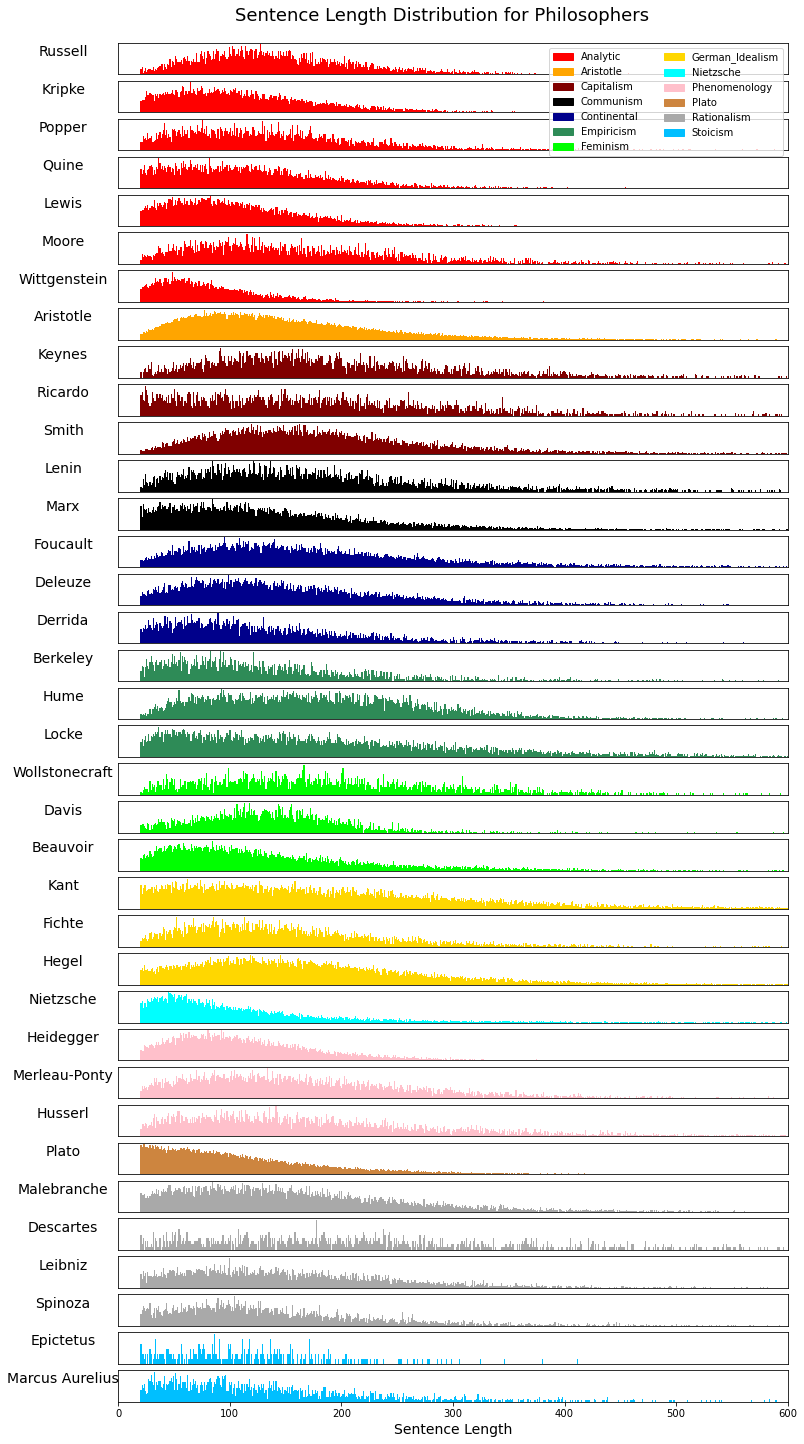

In [23]:
colors = ['red', 'orange', 'maroon', 'black', 'darkblue', 'seagreen', 'lime', 'gold', 'cyan', 'pink', 'peru', 'darkgrey', 'deepskyblue']

school_color = {}

for i in range(len(colors)):
    school_color[schools[i]] = colors[i]

legend_col = []

for i in range(len(colors)):
    x = mpatches.Patch(color = colors[i] , label=schools[i].title())
    legend_col.append(x)

school_author = phil_data_raw[['school','author']].drop_duplicates().sort_values(by = 'school').reset_index()

word_len_dict = {}

for author in school_author['author']:
    word_len_dict[author] = phil_data_raw[phil_data_raw['author'] == author]['sentence_length'].tolist()

fig, axes = plt.subplots(36, 1, sharex=False, sharey=False)

for i in range(len(school_author)):
    axes[i].hist(word_len_dict[school_author['author'][i]], bins=range(min(word_len_dict[school_author['author'][i]]), max(word_len_dict[school_author['author'][i]]) + 1, 1), 
              alpha=1.0, color=school_color[school_author['school'][i]])
    axes[i].axes.yaxis.set_ticks([])
    if i<len(authors)-1:
        axes[i].axes.xaxis.set_ticks([])
    
    axes[i].set_xlim(0,600)
    axes[i].set_ylabel(school_author['author'][i].title(), fontsize=14.0, labelpad = 55.0, rotation = 0)  
    
axes[35].set_xlabel('Sentence Length', fontsize=14.0)
fig.suptitle('Sentence Length Distribution for Philosophers', fontsize=18.0, y = 0.9)
fig.set_figwidth(12)
fig.set_figheight(25)
fig.legend(handles = legend_col, loc = 'upper right', ncol = 2, bbox_to_anchor=(0.9, 0.88))
plt.show()

In [24]:
# Part B: Sentiment and Emotion Analysis for Philosophers

authors = list(set(phil_data_raw['author']))
authors_words = {}

for author in authors:
    authors_words[author] = ' '.join(phil_data_raw[phil_data_raw['author'] == author]['sentence_lowered'].tolist())

In [25]:
#senti_ratio = pd.DataFrame()
senti_ratio = []

for author in authors_words:
    text_object = NRCLex(text = authors_words[author])
    freq = text_object.affect_frequencies
    freq['author'] = author
    senti_ratio.append(freq)
    
senti_ratio = pd.DataFrame(senti_ratio)

In [26]:
senti_ratio = senti_ratio[['sadness', 'fear', 'joy', 'anger', 'disgust', 'trust', 'anticipation', 'surprise', 'positive', 'negative', 'author']]

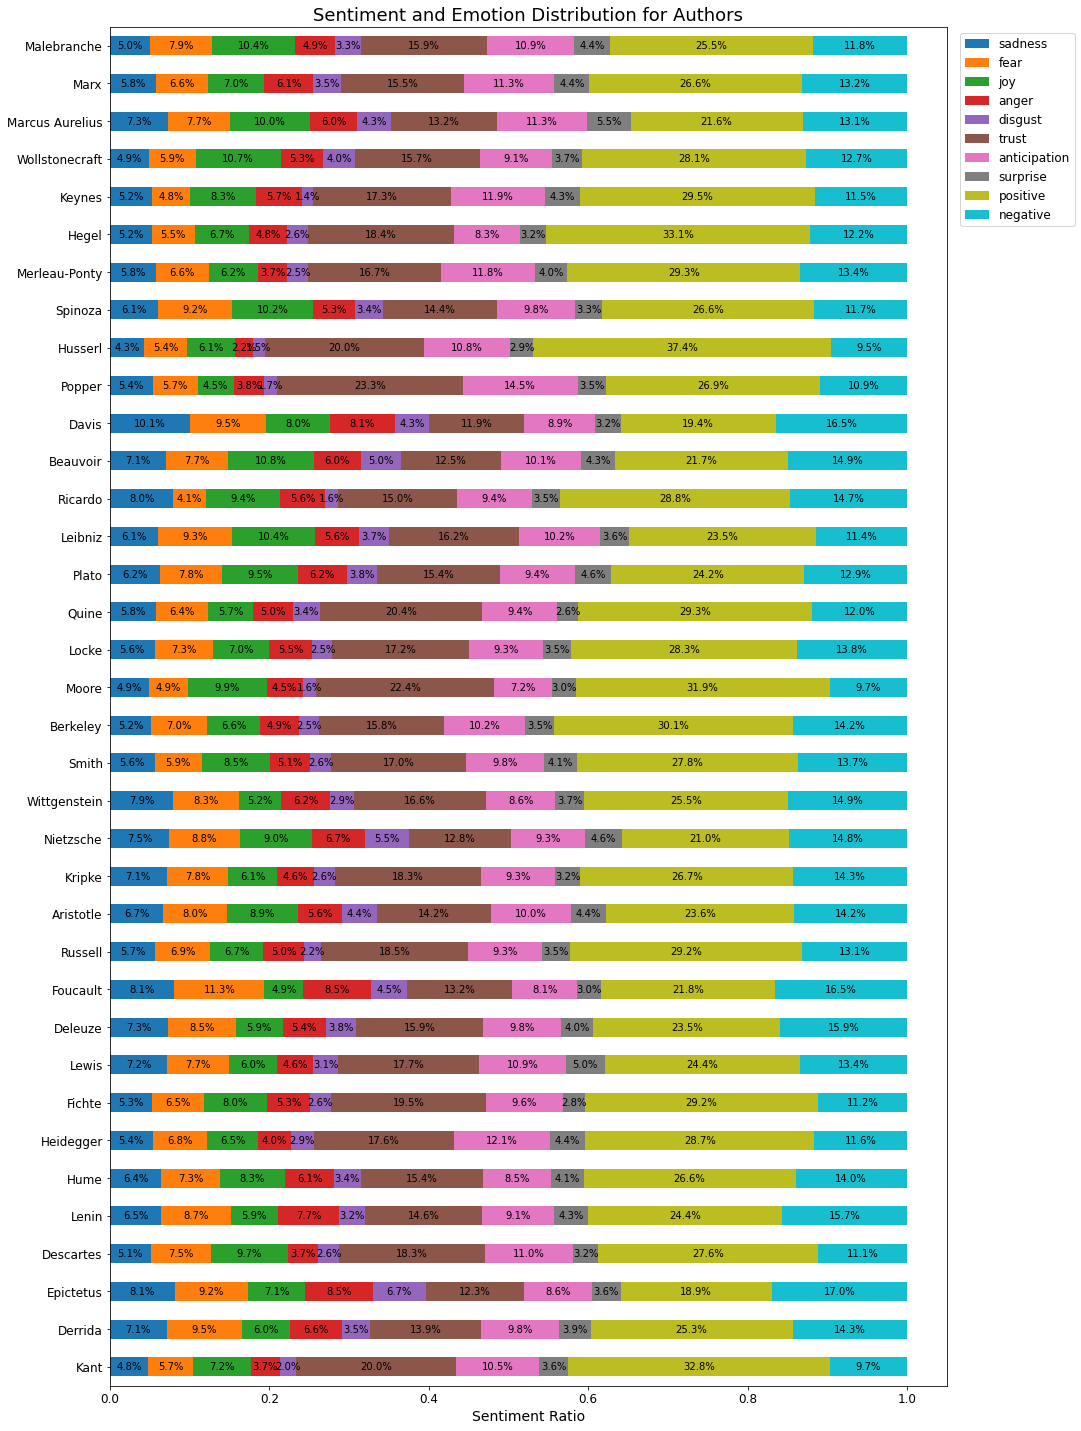

In [27]:
senti_ratio.plot(
    x = 'author',
    kind = 'barh',
    stacked = True,
    title = 'Sentiment and Emotion Distribution for Authors',
    fontsize = 12.0,
    mark_right = True,
    figsize = (15,25),
    sort_columns = True)

df_total = senti_ratio.sum(numeric_only = True, axis = 1)
df_rel = senti_ratio[senti_ratio.columns[:-1]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(senti_ratio.iloc[:, :-1].cumsum(1)[n], senti_ratio[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center')
        
plt.xlabel('Sentiment Ratio', fontsize=14.0)
plt.ylabel('', fontsize=0.0)
plt.title('Sentiment and Emotion Distribution for Authors', fontsize = 18.0)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.16, 1.0), fontsize = 12.0)
plt.show()